### Analyzing the 20 News Group Dataset

The project in this chapter is about the 20 newsgroups dataset. It's composed of text taken from newsgroup articles, as its name implies. It was originally collected by Ken Lang and now has been widely used for experiments in text applications of machine learning techniques, specifically NLP techniques.

The data contains approximately 20,000 documents across 20 online newsgroups. 
A newsgroup is a place on the internet where people can ask and answer questions about a certain topic. The data is already cleaned to a certain degree and already split into training and testing sets. The cutoff point is at a certain date.

The original data comes from http://qwone.com/~jason/20Newsgroups/, with 20 
different topics listed, as follows:
+ comp.graphics
+ comp.os.ms-windows.misc
+ comp.sys.ibm.pc.hardware
+ comp.sys.mac.hardware
+ comp.windows.x
+ rec.autos
+ rec.motorcycles
+ rec.sport.baseball
+ rec.sport.hockey
+ sci.crypt
+ sci.electronics
+ sci.med
+ sci.space
+ misc.forsale
+ talk.politics.misc
+ talk.politics.guns
+ talk.politics.mideast
+ talk.religion.misc
+ alt.atheism
+ soc.religion.christian

All of the documents in the dataset are in English. And we can easily deduce the topics from the newsgroups' names.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import the 20 news group dataset
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
from sklearn.manifold import TSNE

In [2]:
# dowload dataset with all default parameters
groups = fetch_20newsgroups()

### Explore The Dataset

In [3]:
# check the key values
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [4]:
# get the newsgroups names
groups['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

The target key corresponds to a newsgroup, but is encoded as an integer. Then, what are the distinct values for these integers?

They range from 0 to 19, representing the 1st, 2nd, 3rd, …, 20th newsgroup topics in **groups['target_names']**

In [5]:
groups.target

array([7, 4, 4, ..., 3, 1, 8])

In [6]:
np.unique(groups.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

### Distrbution of The Topics 

the distribution is approximately uniform so that's one less thing to 
worry about

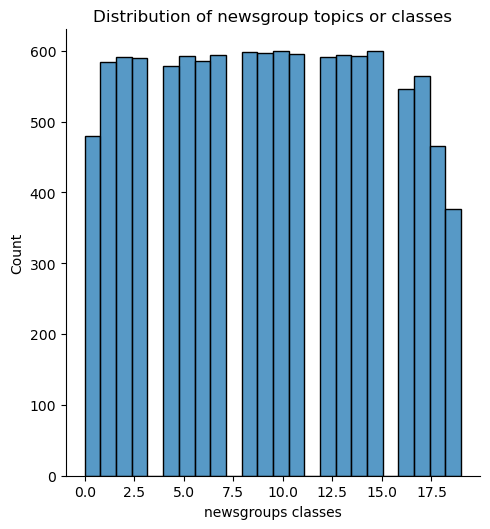

In [7]:
# plot the distribution of topics to get the frequency
sns.displot(groups.target)
plt.title('Distribution of newsgroup topics or classes')
plt.xlabel('newsgroups classes')
#plt.ylabel('')
plt.show()

Now, let's now have a look at the first document and its topic number and name by executing the following command:

In [8]:
# let look at the first documents
groups.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

As you can see, the first document is from the rec.autos newsgroup, which was assigned the number 7. Reading this post, we can easily figure out that it's about cars. The word car actually occurs a number of times in the document. Words such as bumper also seem very car-oriented. However, words such as doors may not necessarily be car related, as they may also be associated with home improvement or another topic.

In [9]:
# let look at the category
groups.target[0]

7

In [10]:
groups.target_names[groups.target[0]]

'rec.autos'

### Counting the Occurrence of each word Token

It seems that we are only interested in the occurrence of certain words, their count, or a related measure, and not in the order of the words. We can therefore view a text as a collection of words. This is called the Bag of Words (BoW) model.

We begin by converting documents into a matrix where each row represents each newsgroup document and each column represents a word token, or specifically, a unigram to begin with. And the value of each element in the matrix is the number of times the word (column) occurs in the document (row). We are utilizing the **CountVectorizer** class from scikit-learn to do the work

In [11]:
# initialize the vectorizer
count_vector = CountVectorizer(max_features=500)

# fit on the raw text data
data_count = count_vector.fit_transform(groups.data)

# check the count
data_count

<11314x500 sparse matrix of type '<class 'numpy.int64'>'
	with 798221 stored elements in Compressed Sparse Row format>

In [12]:
# check count on the first document
data_count[0]

<1x500 sparse matrix of type '<class 'numpy.int64'>'
	with 53 stored elements in Compressed Sparse Row format>

In [13]:
#display the matrix of the first document
data_count.toarray()[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

What are the the 500 top features?

Our first trial doesn't look perfect. Obviously, the most popular tokens are numbers, or letters with numbers such as a86, which do not convey important information. Moreover, there are many words that have no actual meaning, such as you, the, them, and then. Also, some words contain identical information, for example, tell and told, use and used, and time and times. Let's tackle these issues

In [14]:
print(count_vector.get_feature_names_out())

['00' '000' '10' '100' '11' '12' '13' '14' '145' '15' '16' '17' '18' '19'
 '1993' '20' '21' '22' '23' '24' '25' '26' '27' '30' '32' '34' '40' '50'
 '93' 'a86' 'able' 'about' 'above' 'ac' 'access' 'actually' 'address'
 'after' 'again' 'against' 'ago' 'all' 'already' 'also' 'always' 'am'
 'american' 'an' 'and' 'andrew' 'another' 'answer' 'any' 'anyone'
 'anything' 'apple' 'apr' 'april' 'are' 'armenian' 'around' 'article' 'as'
 'ask' 'at' 'au' 'available' 'away' 'ax' 'b8f' 'back' 'bad' 'based' 'be'
 'because' 'been' 'before' 'being' 'believe' 'best' 'better' 'between'
 'bible' 'big' 'bill' 'bit' 'book' 'both' 'but' 'buy' 'by' 'ca' 'call'
 'called' 'came' 'can' 'canada' 'cannot' 'car' 'card' 'case' 'cc' 'center'
 'change' 'children' 'chip' 'christian' 'clipper' 'co' 'code' 'color'
 'com' 'come' 'computer' 'control' 'could' 'course' 'cs' 'current' 'data'
 'david' 'day' 'days' 'de' 'department' 'did' 'didn' 'different' 'disk'
 'distribution' 'do' 'does' 'doesn' 'doing' 'don' 'done' 'dos' 'do

### Text Preprocessing

We begin by retaining letter-only words so that numbers such as 00 and 000 and combinations of letters and numbers such as b8f will be removed. The filter function is defined as follows:

In [15]:
# create an empty list
data_cleaned = []

# join the words that contains alphabets with space in between them
# and append to the empty list
for doc in groups.data:
    doc_cleaned = ' '.join(word for word in doc.split() if word.isalpha())
    data_cleaned.append(doc_cleaned)
    
# verify
#data_cleaned

To drop stop words from the newsgroups data, we simply just need to specify the stop_words parameter

### Reducing inflectional and derivational forms of words

we have two basic strategies to deal with words from the same root—stemming and lemmatization. Stemming is a quicker approach that involves, if necessary, chopping off letters; for example, words becomes wordafter stemming. The result of stemming doesn't have to be a valid word. For instance, trying and try become tri. Lemmatizing, on the other hand, is slower but more accurate. It performs a dictionary lookup and guarantees to return a valid word. Recall that we implemented both stemming and lemmatization using NLTK in a previous section.


In [16]:
# set the names dictionary
all_names = set(names.words())

# drop stop words using the stop_words parameter
count_vector_sw = CountVectorizer(max_features=500, stop_words='english')

# initialize theh lemmatizer
lemmatizer = WordNetLemmatizer()

# join the words that contains alphabets with space in between them
# and append to the empty list
data_cleaned = []
for doc in groups.data:
    doc = doc.lower()
    doc_cleaned = ' '.join(lemmatizer.lemmatize(word)
                          for word in doc.split()
                          if word.isalpha() and 
                          word not in all_names)
    data_cleaned.append(doc_cleaned)
    
# fit and transform the lemmatizer on the cleaned data
data_cleaned_count = count_vector_sw.fit_transform(data_cleaned)

We have just converted text from each raw newsgroup document into a sparse vector of size 500. For a vector from a document, each element represents the number of times a word token occurs in this document. Also, these 500-word tokens are selected based on their overall occurrences after text preprocessing, the removal of stop words, and lemmatization. Now you may ask questions such as, is such an occurrence vector representative enough, or does such an occurrence vector convey enough information that can be used to differentiate the document from documents on other topics? 

In [17]:
# not print the features 
print(count_vector_sw.get_feature_names_out())

['able' 'accept' 'access' 'according' 'act' 'action' 'actually' 'add'
 'address' 'ago' 'agree' 'algorithm' 'allow' 'american' 'anonymous'
 'answer' 'anybody' 'apple' 'application' 'apr' 'april' 'arab' 'area'
 'argument' 'armenian' 'article' 'ask' 'asked' 'assume' 'atheist' 'attack'
 'attempt' 'available' 'away' 'bad' 'based' 'belief' 'believe' 'best'
 'better' 'bible' 'big' 'bike' 'bit' 'black' 'board' 'body' 'book' 'box'
 'build' 'bus' 'buy' 'ca' 'california' 'called' 'came' 'canada' 'car'
 'card' 'care' 'carry' 'case' 'cause' 'center' 'certain' 'certainly'
 'chance' 'change' 'check' 'child' 'chip' 'christian' 'church' 'city'
 'claim' 'clear' 'clinton' 'clipper' 'code' 'college' 'color' 'come'
 'coming' 'command' 'comment' 'common' 'communication' 'company'
 'computer' 'consider' 'considered' 'contact' 'control' 'copy' 'cost'
 'country' 'couple' 'course' 'create' 'crime' 'current' 'cut' 'data'
 'david' 'day' 'db' 'deal' 'death' 'department' 'device' 'did'
 'difference' 'different' 'di

### Visualization

We can answer these questions easily by visualizing those representation vectors. If we can see the document vectors from the same topic form a cluster, we did a good job mapping the documents into vectors. But how? They are of 500 dimensions, while we can visualize data of at most three dimensions. We can resort to t-SNE for dimensionality reduction

Now, let's use t-SNE to verify our count vector representation.
We pick three distinct topics, **talk.religion.misc, comp.graphics, and sci.space,** and visualize document vectors from these three topics

In [23]:
# select three categories
categories_3 = ['talk.religion.misc', 'comp.graphics', 'sci.space']
groups_3 = fetch_20newsgroups(categories=categories_3)

We go through the same process and generate a count matrix, data_cleaned_count_3, with 500 features from the input, groups_3. You can refer to steps in previous sections as you just need to repeat the same code.Next, we apply t-SNE to reduce the 500-dimensional matrix to a two-dimensional matrix

In [25]:
data_cleaned_3 = []
for doc in groups_3.data:
    doc = doc.lower()
    doc_cleaned_3 = ' '.join(lemmatizer.lemmatize(word)
                          for word in doc.split()
                          if word.isalpha() and 
                          word not in all_names)
    data_cleaned_3.append(doc_cleaned_3)
    
# fit and transform the lemmatizer on the cleaned data
data_cleaned_count_3 = count_vector_sw.fit_transform(data_cleaned_3)

We just successfully reduced the input dimension from 500 to 2. Finally, we can easily visualize it in a two-dimensional scatter plot where the x axis is the first dimension, the y axis is the second dimension, and the color, c, is based on the topic label of each original document

In [26]:
# initialize TSNE and fit and transform 
tsne_model = TSNE(n_components=2, perplexity = 40,
                 random_state = 42, learning_rate = 500)
data_tsne = tsne_model.fit_transform(data_cleaned_count_3.toarray())

Data points from the three topics are in different colors, such as green, purple, and yellow. We can observe three clear clusters. Data points from the same topic are close to each other, while those from different topics are far away. Obviously, count vectors are great representations for original text data as they preserve the distinction among three different topics

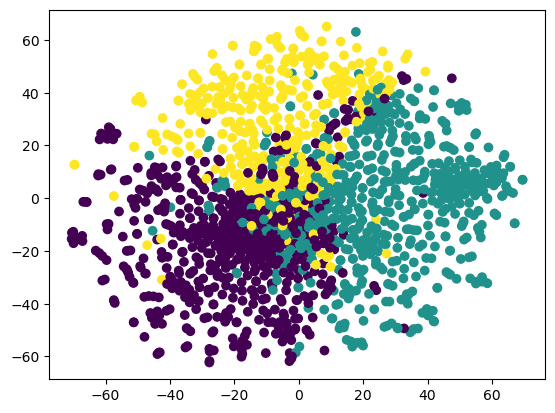

In [27]:
# plot the clutser 
plt.scatter(data_tsne[:, 0], data_tsne[:, 1],
           c = groups_3.target)
plt.show()